<a href="https://colab.research.google.com/github/sfmoram/PDI-SM/blob/main/Lab_2_PDI_Muestreo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='darkred'> Segundo Laboratorio </font>

**Comprender y practicar el muestreo de imágenes, la cuantización de los niveles de intensidad de las imágenes y el cálculo y la visualización de los histogramas**

# <font color='darkred'> Importar las líbrerias</font>

In [25]:
import numpy as np
from cv2 import imread
import matplotlib.pyplot as plt

# <font color='darkred'> Cargar imágenes desde Dropbox </font>

In [26]:
!wget https://www.dropbox.com/s/2qadiidnnu82ve9/mandril.png
!wget https://www.dropbox.com/s/xck9tdnt1kxzah8/scale.png

--2023-08-01 16:38:26--  https://www.dropbox.com/s/2qadiidnnu82ve9/mandril.png
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/2qadiidnnu82ve9/mandril.png [following]
--2023-08-01 16:38:26--  https://www.dropbox.com/s/raw/2qadiidnnu82ve9/mandril.png
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucd268af86efb6e2ce88ecd3fcdf.dl.dropboxusercontent.com/cd/0/inline/CA_nAjXSm4tFirJNFznoPOZ0KH507JckV9ukcaOd6-7F8EM56D1BQIE20gcw9i3dpjOVcgYPC-C9wl3Yscq9_FvmE4cF7eObYC_kukt_Tmh7wngA7TIIMBKcRFD_gvJ2i8u5YVVF84sby1pHzGiUPfSF/file# [following]
--2023-08-01 16:38:27--  https://ucd268af86efb6e2ce88ecd3fcdf.dl.dropboxusercontent.com/cd/0/inline/CA_nAjXSm4tFirJNFznoPOZ0KH507JckV9ukcaOd6-7F8EM56D1BQIE20gcw9i3dpjOVcgYPC-C9wl3Yscq9_FvmE4cF7eObYC_kukt_T

# <font color='darkred'> Función que nos dice cómo es la imagen

In [27]:
def comoes(img):
  print('size = ',img.shape)
  print('max  = ',np.max(img))
  print('min  = ',np.min(img))

# <font color='darkred'> Asignamos nombres a las imagenes

In [28]:
st_img = 'scale.png'
#st_img = 'mandril.png'


 # <font color='darkred'> Leer una imagen y se visualiza en escala de grises

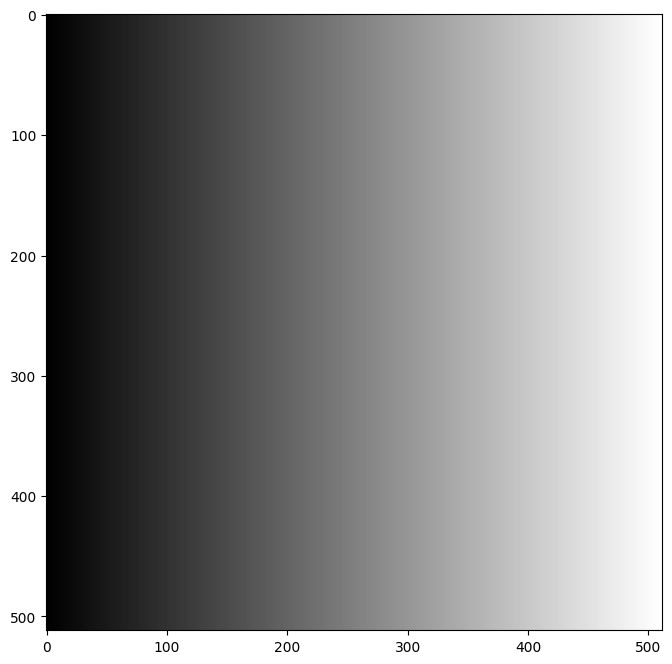

In [29]:
img = imread(st_img)
X = img[:,:,0]
plt.figure(figsize=(8,8))
plt.imshow(X,cmap='gray')
plt.show()

 # <font color='darkred'> Realiza un muestreo o "downsampling" de la imagen original, tomando cada d-ésimo píxel de la imagen

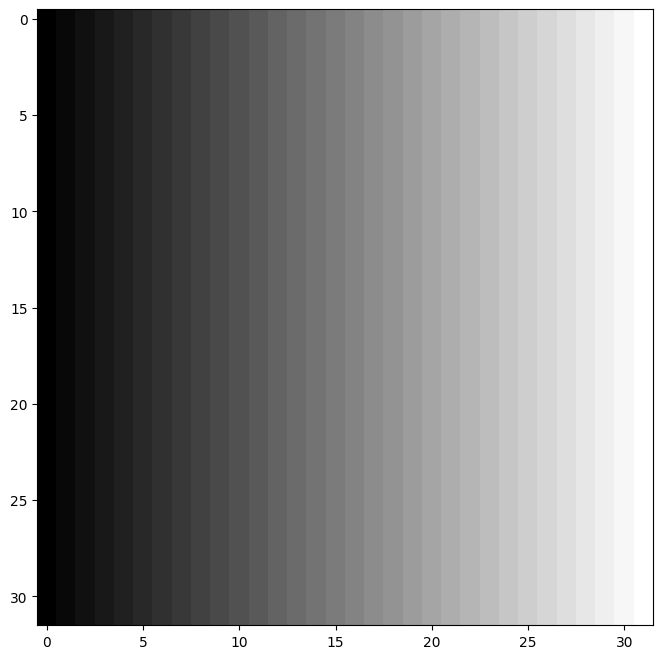

size =  (32, 32)
max  =  248
min  =  0


In [30]:
d = 16   # Define el factor de muestreo. En este caso, se muestreará cada 16 píxeles.
(Nx,Mx) = X.shape # Obtiene las dimensiones de la imagen original (altura y anchura en píxeles).
ix = range(0,Nx,d)
jx = range(0,Mx,d)
Ny = len(ix)
My = len(jx)
Y = np.zeros((Ny,My),np.uint8)
for i in range(Ny):
  for j in range(My):
    Y[i,j] = X[ix[i],jx[j]]
plt.figure(figsize=(8,8))
plt.imshow(Y,cmap='gray') # Muestra la imagen muestreada Y en escala de grises
plt.show()
comoes(Y)

 # <font color='darkred'> Realiza un muestreo de la imagen original, pero a diferencia del anterior, no reduce el tamaño de la imagen. En lugar de eso, cada bloque de dxd píxeles en la imagen original se reemplaza por el valor del píxel en la esquina superior izquierda de ese bloque.

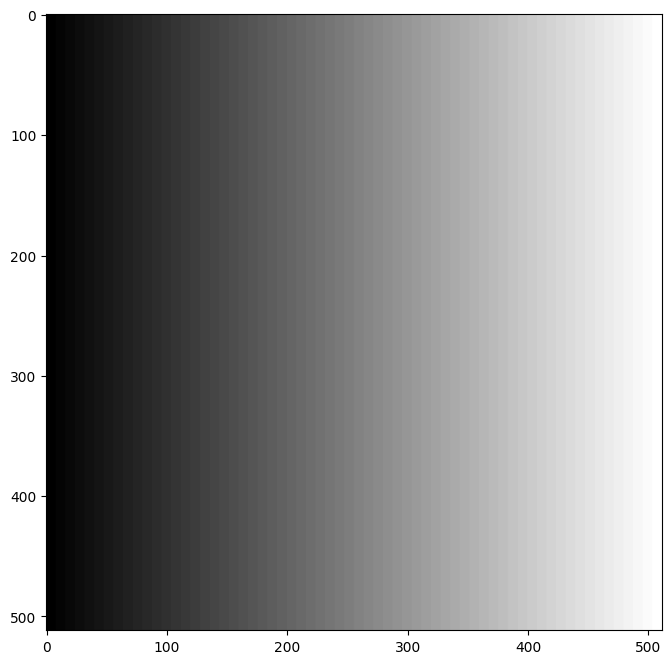

size =  (512, 512)
max  =  252
min  =  0
desplegado como =  64 x 64


In [31]:
d = 8  # Define el tamaño del bloque de píxeles que se muestrearán. En este caso, cada bloque de 8x8 píxeles se muestreará.
(Nx,Mx) = X.shape
Ny = Nx
My = Mx
Y = np.zeros((Ny,My),np.uint8)
for i in range(Ny):
  for j in range(My):
    ix = int(np.fix(i/d)*d)
    jx = int(np.fix(j/d)*d)
    Y[i,j] = X[ix,jx]
plt.figure(figsize=(8,8))
plt.imshow(Y,cmap='gray')  # Muestra la imagen muestreada Y en escala de grises.
plt.show()
comoes(Y)
print('desplegado como = ',int(Nx/d),'x',int(Nx/d))

 # <font color='darkred'> Función imhist / Calcula el histograma de una imagen.

 **La función imhist toma una imagen en escala de grises y devuelve su histograma, que es una descripción estadística de las intensidades de sus píxeles**

In [32]:
def imhist(X,n=256): # Por defecto, n es 256, lo que significa que se asume que la imagen es de 8 bits y puede tener valores de píxeles de 0 a 255.
  (N,M) = X.shape
  h = np.zeros((n,))
  for i in range(N):
    for j in range(M):
      x = X[i,j]
      h[x] = h[x]+1
  return h


  # <font color='darkred'> Calcula y grafica el histograma de la imagen Y

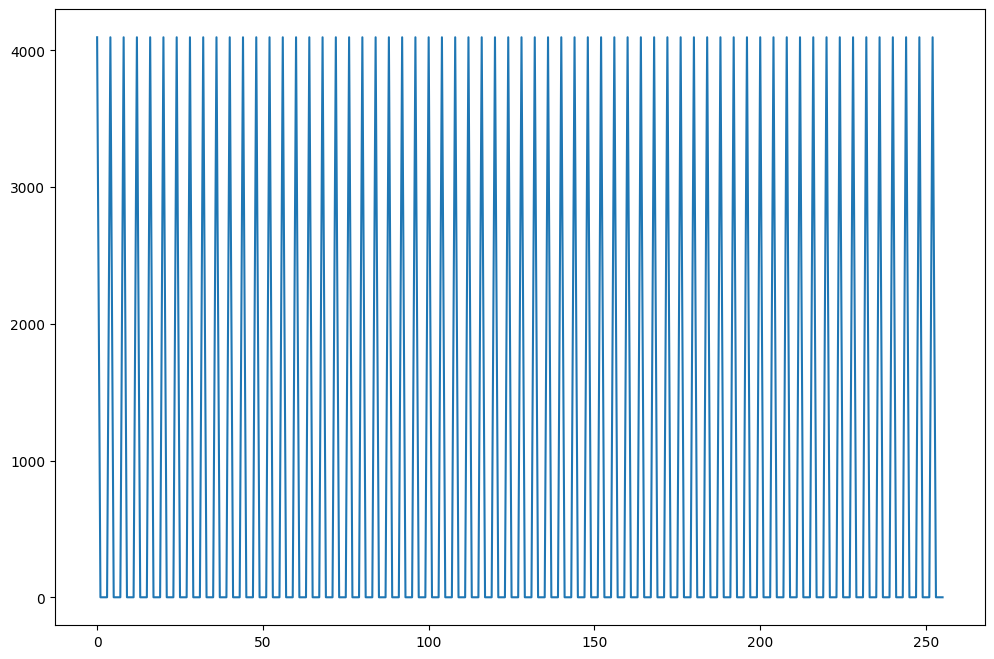

In [33]:
n = 256
h = imhist(Y,n=n)
plt.figure(figsize=(12,8))
plt.plot(range(n),h[0:n])
plt.show()


  # <font color='darkred'> Realiza una cuantización de los niveles de intensidad (o tonos de gris) de la imagen original. Es decir, está reduciendo la cantidad de posibles tonos de gris en la imagen.

**Reduce la cantidad de posibles tonos de gris en la imagen original y luego visualiza e imprime información sobre la imagen cuantizada.**

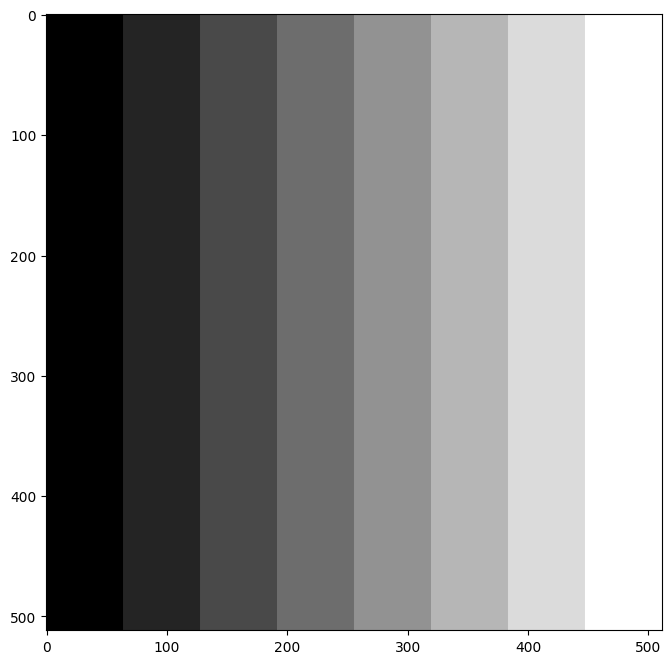

size =  (512, 512)
max  =  224
min  =  0
esta imagen tiene =  8  tonos de gris


In [34]:
p = 32  # Esta es la constante de cuantización, cada p tonos de gris en la imagen original se convertirán en un solo tono en la imagen cuantizada.
(Nx,Mx) = X.shape
Ny = Nx
My = Mx
Y = np.zeros((Ny,My),np.uint8)
for i in range(Ny):
  for j in range(My):
    x = int(np.fix(X[i,j]/p)*p)
    Y[i,j] = x
plt.figure(figsize=(8,8))
plt.imshow(Y,cmap='gray')
plt.show()
comoes(Y)
print('esta imagen tiene = ',int(256/p),' tonos de gris')  # Imprime el número de tonos de gris que la imagen cuantizada puede tener

  # <font color='darkred'> Calcula y grafica el histograma de la imagen Y cuantizada

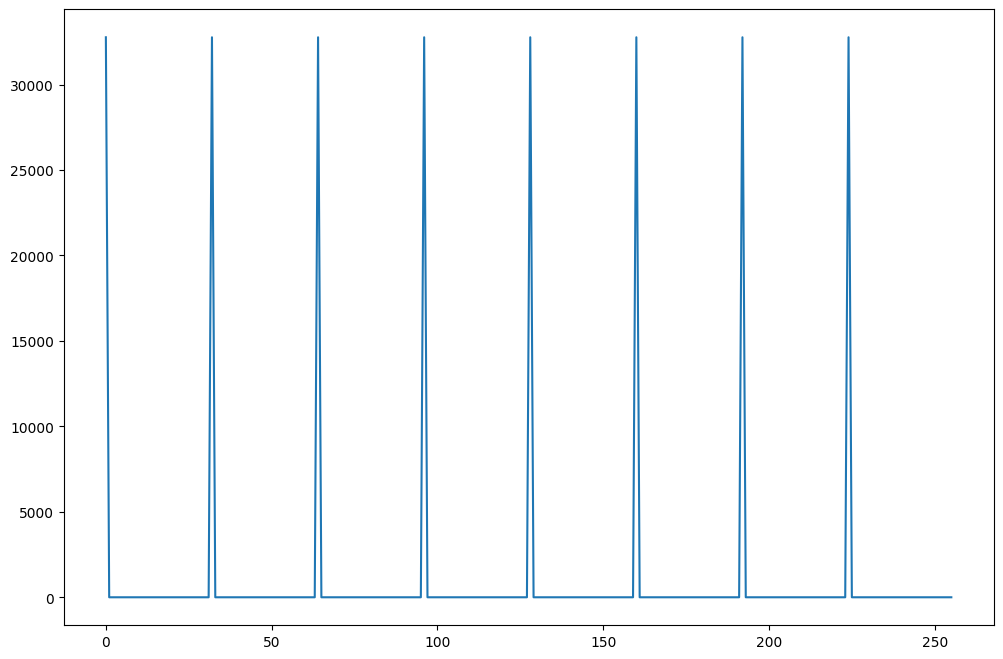

In [35]:
n = 256
h = imhist(Y,n=n)
plt.figure(figsize=(12,8))
plt.plot(range(n),h[0:n])
plt.show()

   # <font color='darkred'> Imprime los primeros 256 elementos del array h (imagen cuantizada)

In [36]:
print(h[0:256])

[32768.     0.     0.     0.     0.     0.     0.     0.     0.     0.
     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
     0.     0. 32768.     0.     0.     0.     0.     0.     0.     0.
     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
     0.     0.     0.     0. 32768.     0.     0.     0.     0.     0.
     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
     0.     0.     0.     0.     0.     0. 32768.     0.     0.     0.
     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
     0.     0.     0.     0.     0.     0.     0.     0. 32768.     0.
     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
     0